C:\Users\shrey\Anaconda3\Lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\shrey\Anaconda3\Lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52


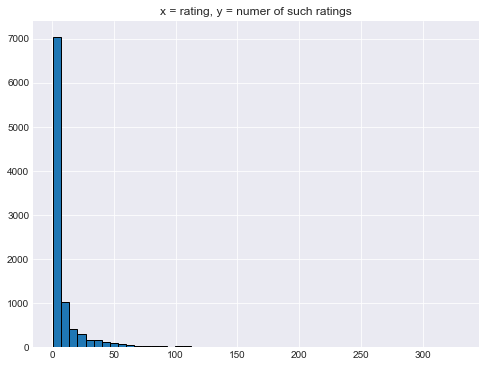

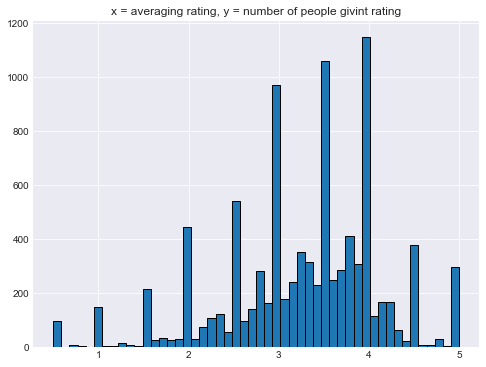

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set_style('dark')  
%matplotlib inline

ratings_data = pd.read_csv("C:\\Users\\shrey\\Desktop\\sem-7\\IRS-lab\\15BIT059_P8\\ml-latest-small\\ratings.csv")
ratings_data.head()
movie_names = pd.read_csv("C:\\Users\\shrey\\Desktop\\sem-7\\IRS-lab\\15BIT059_P8\\ml-latest-small\\movies.csv")  
movie_names.head() 

movie_data = pd.merge(ratings_data, movie_names, on='movieId')
movie_data.head()

movie_data.groupby('title')['rating'].mean().head()

movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())
ratings_mean_count.head()

plt.figure(figsize=(8,6))  
plt.title("x = rating, y = numer of such ratings")
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_counts'].hist(bins=50)

plt.figure(figsize=(8,6))  
plt.title("x = averaging rating, y = number of people givint rating")
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating'].hist(bins=50) 

user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')
user_movie_rating.head()
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']
forrest_gump_ratings.head()

movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])  
corr_forrest_gump.dropna(inplace=True)  
corr_forrest_gump.head()

movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])  
corr_forrest_gump.dropna(inplace=True)  
corr_forrest_gump.head() 
corr_forrest_gump.sort_values('Correlation', ascending=False).head(10)
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])  
corr_forrest_gump.head() 
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head() 